Dataset is available locally
excerpt of the training data..


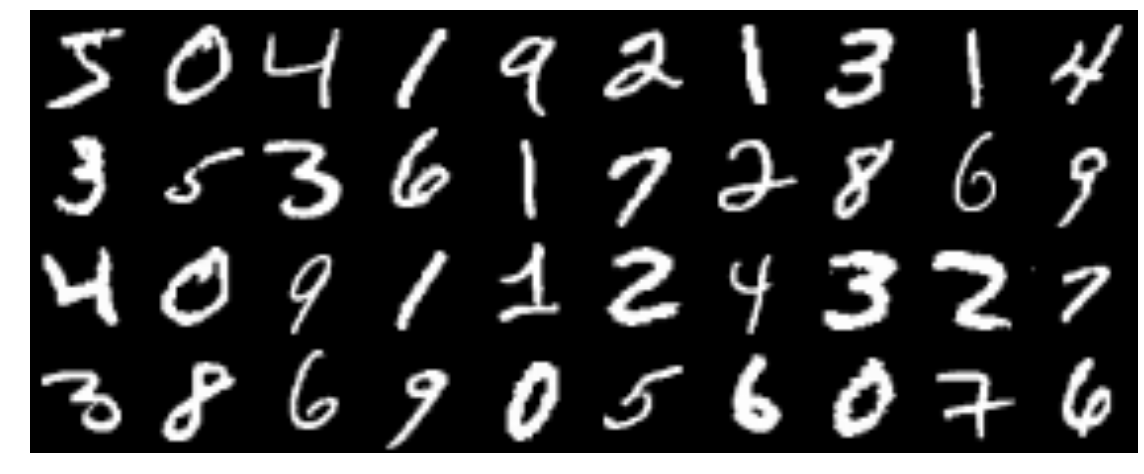

(50000, 784)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle, gzip, requests, os, sys
sys.path.insert(0, '../..')
import helper
import numpy as np

# download dataset, if needed
if not os.path.isfile("mnist.pkl.gz"):
    print("dataset does not exist! Starting to download...")
    url = "http://deeplearning.net/data/mnist/mnist.pkl.gz"
    r = requests.get(url)
    if not r.ok:
        print("nope, something went wrong.. could not download dataset")
    else:
        with open('mnist.pkl.gz', 'wb') as handle:
            for block in r.iter_content(1024):
                handle.write(block)
else:
    print("Dataset is available locally")
    
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

print("excerpt of the training data..")
R = helper.un_vectorize(train_set[0])
helper.plot_mats(R[:40], cols=10)
print(train_set[0].shape)

## Super-Simple NN

Implementation of a super-simple NN.

Given a set of $28\times 28$ images, the NN has $784$ input nodes and $10$ output nodes

### Representation of weights

Given each output unit its own map of the input image and display the weights coming from each pixel in the location of that pixel in the map (Random initialization).

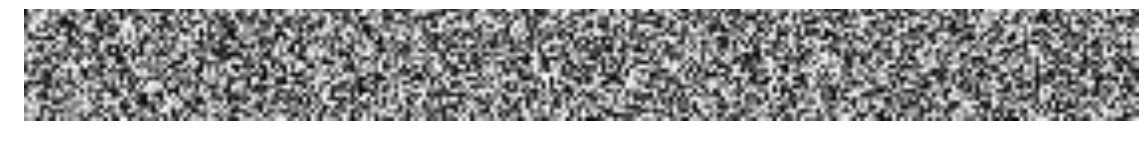

In [24]:
def linear_neuron(x, w, b=0):
    return b + np.sum(x*w)

class Output:
    def __init__(self, size):
        self.w = np.random.rand((size))

    def w_img(self):
        return helper.un_vectorize(np.expand_dims(self.w, 0))[0]
    
    def train(self, I):
        self.w += I
        self.w = self.w / np.max(self.w)
    
    def guess(self, I):
        diff = I - self.w
        return np.linalg.norm(diff)

class Simple_NN:
    def __init__(self):
        self.output = [Output(784) for _ in range(10)]

    def plot_weights(self):
        imgs = [o.w_img() for o in self.output]
        helper.plot_mats(imgs, cols=10)

    def guess(self, I):
        min_guess_v = self.output[0].guess(I)
        min_guess = 0
        for i in range(1, 10):
            guess_candidate = self.output[i].guess(I)
            if guess_candidate < min_guess_v:
                min_guess_v = guess_candidate
                min_guess = i
        return min_guess
    
    def train(self, I, label):
        self.output[label].train(I)
        
snn = Simple_NN()
snn.plot_weights()

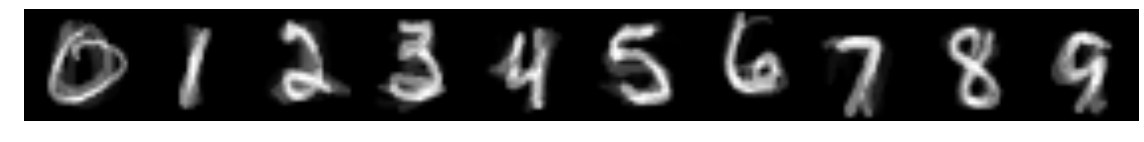

In [25]:
snn = Simple_NN()
for i in range(train_set[0].shape[0]):
    I = train_set[0][i]
    label = train_set[1][i]
    snn.train(I, label)

snn.plot_weights()

In [26]:
# test the output
right = 0
wrong = 0
total = test_set[0].shape[0]

for i in range(test_set[0].shape[0]):
    I = test_set[0][i]
    label = test_set[1][i]
    guess = snn.guess(I)
    if guess != label:
        wrong += 1
    else:
        right += 1

print("Correct:" + str(right/total))
print("Wrong:" + str(wrong/total))

Correct:0.5816
Wrong:0.4184
